<a href="https://colab.research.google.com/github/figueiredoelizeu/Projeto_Transfer_Learning_Python/blob/main/exemplometricaavaliacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- Definição da Função de Cálculo de Métricas (a mesma que já usamos) ---
def calcular_metricas_classificacao(y_real, y_previsao):
    """
    Calcula as principais métricas de avaliação para modelos de classificação.

    Args:
        y_real (array-like): Os rótulos verdadeiros (reais).
        y_previsao (array-like): Os rótulos previstos pelo modelo.

    Returns:
        dict: Um dicionário contendo Acurácia, Sensibilidade, Especificidade,
              Precisão e F1-score.
    """
    y_real = np.array(y_real)
    y_previsao = np.array(y_previsao)

    mc = confusion_matrix(y_real, y_previsao)
    VN, FP, FN, VP = mc.ravel()

    print(f"Matriz de Confusão:\n{mc}")
    print(f"VN: {VN}, FP: {FP}, FN: {FN}, VP: {VP}\n")

    acuracia = 0.0
    sensibilidade = 0.0
    especificidade = 0.0
    precisao = 0.0
    f1_score = 0.0

    total_previsoes = VP + VN + FP + FN
    if total_previsoes > 0:
        acuracia = (VP + VN) / total_previsoes

    if (VP + FN) > 0:
        sensibilidade = VP / (VP + FN)

    if (VN + FP) > 0:
        especificidade = VN / (VN + FP)

    if (VP + FP) > 0:
        precisao = VP / (VP + FP)

    if (precisao + sensibilidade) > 0:
        f1_score = 2 * (precisao * sensibilidade) / (precisao + sensibilidade)

    metricas = {
        "Acurácia": acuracia,
        "Sensibilidade (Recall)": sensibilidade,
        "Especificidade": especificidade,
        "Precisão": precisao,
        "F1-score": f1_score
    }
    return metricas

# --- Simulação de Resultados Reais e Previsões do Modelo ---
# Para ter 100 valores, vamos criar alguns arrays
# y_real: 30 clientes compraram (1), 70 não compraram (0)
np.random.seed(42) # Para resultados reproduzíveis
y_real = np.concatenate([np.ones(30, dtype=int), np.zeros(70, dtype=int)])
np.random.shuffle(y_real) # Mistura para não ficar tudo ordenado

# y_previsao: Vamos simular um modelo que acerta a maioria, mas com alguns erros
y_previsao = np.copy(y_real) # Começa com todas as previsões corretas

# Introduzir alguns erros no y_previsao para tornar o exemplo realista
# 5 Falsos Positivos (previu 1, mas era 0)
falsos_positivos_indices = np.random.choice(np.where(y_real == 0)[0], size=5, replace=False)
y_previsao[falsos_positivos_indices] = 1

# 7 Falsos Negativos (previu 0, mas era 1)
falsos_negativos_indices = np.random.choice(np.where(y_real == 1)[0], size=7, replace=False)
y_previsao[falsos_negativos_indices] = 0

print(f"Total de amostras: {len(y_real)}\n")
print(f"Valores Reais (primeiros 10): {y_real[:10]}")
print(f"Previsões do Modelo (primeiros 10): {y_previsao[:10]}\n")

Total de amostras: 100

Valores Reais (primeiros 10): [0 0 0 0 0 0 1 0 1 1]
Previsões do Modelo (primeiros 10): [0 0 0 0 0 0 1 0 0 1]



In [ ]:
# --- Calcular as Métricas de Avaliação ---
resultados_modelo = calcular_metricas_classificacao(y_real, y_previsao)

print("---")
print("Resultados das Métricas de Avaliação para o Modelo de Compra de Cliente:")
for nome, valor in resultados_modelo.items():
    print(f"{nome}: {valor:.4f}")

Matriz de Confusão:
[[65  5]
 [ 7 23]]
VN: 65, FP: 5, FN: 7, VP: 23

---
Resultados das Métricas de Avaliação para o Modelo de Compra de Cliente:
Acurácia: 0.8800
Sensibilidade (Recall): 0.7667
Especificidade: 0.9286
Precisão: 0.8214
F1-score: 0.7931


Total de amostras: 100

Matriz de Confusão bruta:
 [[65  5]
 [ 7 23]]

Métricas calculadas:
 {'Acurácia': np.float64(0.88), 'Sensibilidade (Recall)': np.float64(0.7666666666666667), 'Especificidade': np.float64(0.9285714285714286), 'Precisão': np.float64(0.8214285714285714), 'F1-score': np.float64(0.793103448275862)}


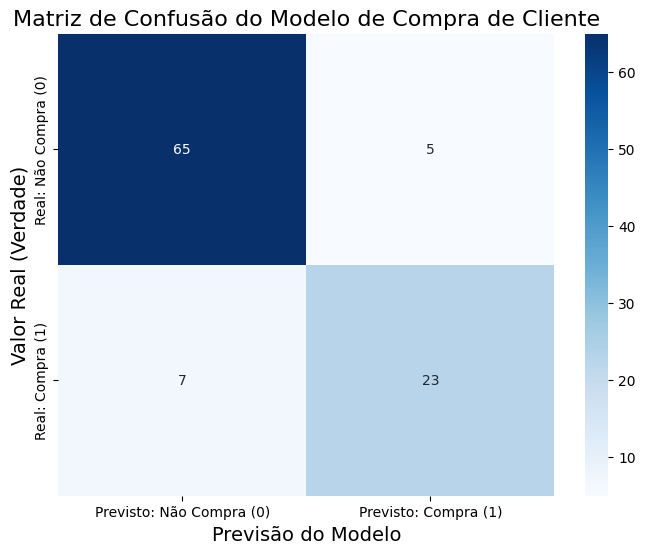

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- Definição da Função de Cálculo de Métricas (a mesma que já usamos) ---
# (Mantida aqui para garantir que o código seja autocontido e executável)
def calcular_metricas_classificacao(y_real, y_previsao):
    y_real = np.array(y_real)
    y_previsao = np.array(y_previsao)
    mc = confusion_matrix(y_real, y_previsao)
    VN, FP, FN, VP = mc.ravel()

    acuracia = 0.0
    sensibilidade = 0.0
    especificidade = 0.0
    precisao = 0.0
    f1_score = 0.0

    total_previsoes = VP + VN + FP + FN
    if total_previsoes > 0:
        acuracia = (VP + VN) / total_previsoes
    if (VP + FN) > 0:
        sensibilidade = VP / (VP + FN)
    if (VN + FP) > 0:
        especificidade = VN / (VN + FP)
    if (VP + FP) > 0:
        precisao = VP / (VP + FP)
    if (precisao + sensibilidade) > 0:
        f1_score = 2 * (precisao * sensibilidade) / (precisao + sensibilidade)

    metricas = {
        "Acurácia": acuracia,
        "Sensibilidade (Recall)": sensibilidade,
        "Especificidade": especificidade,
        "Precisão": precisao,
        "F1-score": f1_score
    }
    return mc, metricas # Retorna a matriz de confusão e as métricas


# --- Simulação de Resultados Reais e Previsões do Modelo (os mesmos do exemplo anterior) ---
np.random.seed(42) # Para resultados reproduzíveis
y_real = np.concatenate([np.ones(30, dtype=int), np.zeros(70, dtype=int)])
np.random.shuffle(y_real)

y_previsao = np.copy(y_real)
falsos_positivos_indices = np.random.choice(np.where(y_real == 0)[0], size=5, replace=False)
y_previsao[falsos_positivos_indices] = 1
falsos_negativos_indices = np.random.choice(np.where(y_real == 1)[0], size=7, replace=False)
y_previsao[falsos_negativos_indices] = 0

print(f"Total de amostras: {len(y_real)}\n")

# --- 1. Calcular a Matriz de Confusão ---
mc, metricas = calcular_metricas_classificacao(y_real, y_previsao)

print("Matriz de Confusão bruta:\n", mc)
print("\nMétricas calculadas:\n", metricas)


### 2. Criar o Gráfico da Matriz de Confusão

plt.figure(figsize=(8, 6)) # Define o tamanho da figura para melhor visualização

# sns.heatmap cria o mapa de calor
# mc: a matriz de confusão
# annot=True: exibe os valores numéricos em cada célula
# fmt='g': formata os números como inteiros (general format)
# cmap='Blues': define a paleta de cores (outras opções: 'viridis', 'YlGnBu', 'rocket')
# xticklabels e yticklabels: definem os rótulos dos eixos, tornando-os mais legíveis
sns.heatmap(mc, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Previsto: Não Compra (0)', 'Previsto: Compra (1)'],
            yticklabels=['Real: Não Compra (0)', 'Real: Compra (1)'])

plt.xlabel('Previsão do Modelo', fontsize=14)
plt.ylabel('Valor Real (Verdade)', fontsize=14)
plt.title('Matriz de Confusão do Modelo de Compra de Cliente', fontsize=16)
plt.show()